<h1>Import all libraries and reading explored data into Dataframe</h1>

In [11]:
import re
import io

#General libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import preprocessing

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

#For Random Forest implementation
from sklearn.ensemble import RandomForestClassifier

#For Baseline implementation
from sklearn.dummy import DummyClassifier

#Settings
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(threshold=np.nan)
sns.set()

def printModelAccuracy(y_test, y_pred):
    # Find the confusion matrix of the result
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5]), \
        index=['true:1', 'true:2', 'true:3', 'true:4', 'true:5'], 
        columns=['pred:1', 'pred:2', 'pred:3', 'pred:4', 'pred:5'])
    print("Confusion Matrix:")
    print(cm)

    # Find the accuracy and F1 score of the result
    asr = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    print("Accuracy:",asr)
    print("F1:", f1)
    
# Read from dataframe
df = pd.read_pickle("explored_data")
df = df.replace([np.inf, -np.inf, np.nan], 0) #removing infinite/nan values

# Check the columns using dtypes
print(df.dtypes)
# Randomly sample 5 records with .sample(5)
df.sample(5)

budget                 float64
revenue                float64
weekday                float64
day                    float64
month                  float64
year                   float64
runtime                float64
vote_average           float64
vote_count             float64
weighted_rating        float64
bin                    float64
log_revenue            float64
log_budget             float64
log_runtime            float64
log_vote_count         float64
log_vote_average       float64
log_weighted_rating    float64
dtype: object


,budget,revenue,weekday,day,month,year,runtime,vote_average,vote_count,weighted_rating,bin,log_revenue,log_budget,log_runtime,log_vote_count,log_vote_average,log_weighted_rating
23404,0.00,30500.00,2.00,1.00,1.00,2013.00,9.00,0.00,0.00,7.00,1.00,10.33,0.00,2.20,0.00,0.00,1.95
10580,0.00,22586863.00,4.00,3.00,9.00,2015.00,101.00,6.30,1191.00,6.97,4.00,16.93,0.00,4.62,7.08,1.84,1.94
10697,0.00,60000.00,5.00,25.00,3.00,2016.00,108.00,7.40,28.00,7.00,2.00,11.00,0.00,4.68,3.33,2.00,1.95
22913,0.00,315.00,5.00,15.00,6.00,2012.00,129.00,8.50,1.00,7.00,1.00,5.75,0.00,4.86,0.00,2.14,1.95
13792,50000000.00,44547681.00,3.00,29.00,7.00,1998.00,140.00,6.90,909.00,7.00,4.00,17.61,17.73,4.94,6.81,1.93,1.95


In [3]:
#Decision Tree in SKLearn don't take in string well. So we use a label encoder to change that string to a numeric value
"""
for column in df.columns:
    if df[column].dtype == type(object):
        #Create the label encoder
        le = preprocessing.LabelEncoder()
        #Convert the non numeric data to numeric
        df[column] = le.fit_transform(df[column])
"""

'\nfor column in df.columns:\n    if df[column].dtype == type(object):\n        #Create the label encoder\n        le = preprocessing.LabelEncoder()\n        #Convert the non numeric data to numeric\n        df[column] = le.fit_transform(df[column])\n'

<h1>Find out the number of records per revenue bin. </h1>

   bin     n
0 1.00  3502
1 2.00  3500
2 3.00  3502
3 4.00  3502
4 5.00  3505


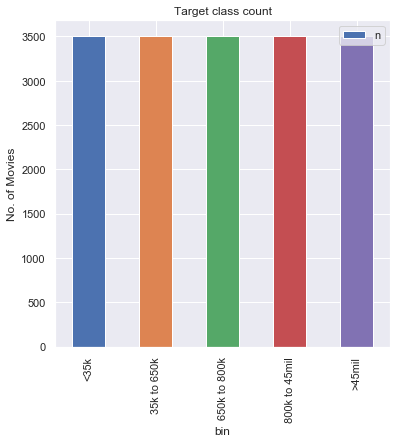

In [4]:
# Using groupby, find out the number of reviews with
# positive and negative sentiment respectively.
df_target = df.groupby('bin').size().reset_index(name='n')
print(df_target)

# How many patients in the dataset have been diagnosed positive and negative for diabetes?
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)
df_target.plot(kind='bar', x='bin', y='n', title = "Target class count", ax=ax1)
ax1.set_ylabel("No. of Movies")
plt.xticks(np.arange(0,5), ["<35k", "35k to 650k", "650k to 800k", "800k to 45mil", ">45mil"])
plt.show()

<h1>Train-Test Split</h1>

In [4]:
#X = df.loc[:, df.columns != 'bin']
X = df[['budget', 'weekday', 'day', 'month', 'year', 'runtime', 'vote_average', 'vote_count', 'weighted_rating']]
#X = df[['log_budget', 'weekday', 'day', 'month', 'year', 'log_runtime', 'log_vote_average', 'log_vote_count', 'log_weighted_rating']]
y = df[['bin']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

<h1>Baseline Classifier</h1>

In [7]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train.values.ravel())

#Use the trained model to predict the test data
y_pred = dummy.predict(X_test)

# Find the confusion matrix, the accuracy, and F1 score of the result
printModelAccuracy(y_test, y_pred)

Confusion Matrix:
        pred:1  pred:2  pred:3  pred:4  pred:5
true:1       0       0       0     691       0
true:2       0       0       0     718       0
true:3       0       0       0     698       0
true:4       0       0       0     667       0
true:5       0       0       0     729       0
Accuracy: 0.19040822152440764
F1 per Class: 0.06398081534772182


C:\Users\andy_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h1>1. k-Nearest Neighbor (KNN)</h1>

Refer to the following links on for detail explanation on the implementation:
- [kNN Classifier SKLearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [DataCamp Implementation](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)



In [7]:
#Create the kNN classifier and set the number of neighbors. Note that you can tune this number of neighbors
knn = KNeighborsClassifier()

parameters = {'n_neighbors':list(range(1, 10)),
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the training feature Xs and training label Ys
knn = GridSearchCV(knn, cv=3, param_grid=parameters, scoring='f1_macro')
knn.fit(X_train,y_train.values.ravel())

#Use the trained model to predict the test data
y_pred = knn.predict(X_test)

# Find the confusion matrix, the accuracy, and F1 score of the result
printModelAccuracy(y_test, y_pred)

# Best hyperparameters to use for model
print("Best Parameters:",knn.best_params_)

Confusion Matrix:
        pred:1  pred:2  pred:3  pred:4  pred:5
true:1     509     311     139      62      18
true:2     421     330     208      95      18
true:3     304     251     273     178      56
true:4     208     138     178     311     190
true:5     114      81      93     220     548
Accuracy: 0.375142748382185
F1 per Class: 0.3768499127894357
Best Parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 9}


<h1>2. Bagging (with Decision Tree)</h1>

Refer to the following links on for detail explanation on the implementation:
- [Bagging Classifier SKLearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

*Note that the default AdaBoost implementation in SKLearn is Decision Tree 

In [8]:
#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
baggingTree = BaggingClassifier(n_estimators=50)

#Fit the training feature Xs and training label Ys
baggingTree.fit(X_train, y_train.values.ravel())

#Use the trained model to predict the test data
y_pred = baggingTree.predict(X_test)

# Find the confusion matrix, the accuracy, and F1 score of the result
printModelAccuracy(y_test, y_pred)

Confusion Matrix:
        pred:1  pred:2  pred:3  pred:4  pred:5
true:1     520     281     138      74      26
true:2     341     359     250      93      29
true:3     216     235     367     195      49
true:4     139     130     199     395     162
true:5      87      79      69     200     621
Accuracy: 0.43052912066996574
F1 per Class: 0.4333864759973953


<h1>3. Bagging (with kNN)</h1>

In [9]:
#Create the kNN base classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
baggingknn = BaggingClassifier(n_estimators=50, base_estimator=knn)

#Fit the training feature Xs and training label Ys
baggingknn.fit(X_train, y_train.values.ravel())

#Use the trained model to predict the test data
y_pred = baggingknn.predict(X_test)

# Find the confusion matrix, the accuracy, and F1 score of the result
printModelAccuracy(y_test, y_pred)

Confusion Matrix:
        pred:1  pred:2  pred:3  pred:4  pred:5
true:1     399     300     176     112      52
true:2     320     334     219     139      60
true:3     226     238     306     196      96
true:4     152     139     195     312     227
true:5      88      87      92     222     567
Accuracy: 0.36505519604111153
F1 per Class: 0.3654541688306184


<h1>4. AdaBoost (with Decision Tree)</h1>

Refer to the following links on for detail explanation on the implementation:
- [AdaBoost Classifier SKLearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- [DataCamp Implementation](https://www.datacamp.com/community/tutorials/adaboost-classifier-python)
- [Setting Learning Rate and N Estimators](https://stats.stackexchange.com/questions/82323/shrinkage-parameter-in-adaboost)

*Note that the default AdaBoost implementation in SKLearn is Decision Tree 


In [10]:
#Create the AdaBoost classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
# - learning_rate controls the weight adjustments of each base classifiers. Default is 1
adaboostTree = AdaBoostClassifier(n_estimators=50,learning_rate=1)

#Fit the training feature Xs and training label Ys
adaboostTree.fit(X_train, y_train.values.ravel())

#Use the trained model to predict the test data
y_pred = adaboostTree.predict(X_test)

# Find the confusion matrix, the accuracy, and F1 score of the result
printModelAccuracy(y_test, y_pred)

Confusion Matrix:
        pred:1  pred:2  pred:3  pred:4  pred:5
true:1     697     156     154      26       6
true:2     536     238     242      48       8
true:3     346     183     363     135      35
true:4     222      92     246     303     162
true:5     121      51      89     185     610
Accuracy: 0.42082223068138563
F1 per Class: 0.41500726565009033


<h1>5. AdaBoost (with Gaussian Navie Bayes)</h1>

Refer to the following links on for detail explanation on the implementation:
- [Gaussian Naive Bayes Classifier SKLearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- [Naive Bayes Classifier video](https://www.youtube.com/watch?v=CPqOCI0ahss)

In [11]:
naivebayes = GaussianNB()
#Fit the training feature Xs and training label Ys
naivebayes.fit(X_train, y_train.values.ravel())

#Use the trained model to predict the test data
y_pred = naivebayes.predict(X_test)

# Find the confusion matrix, the accuracy, and F1 score of the result
printModelAccuracy(y_test, y_pred)

Confusion Matrix:
        pred:1  pred:2  pred:3  pred:4  pred:5
true:1     697     246      70      26       0
true:2     604     309      96      56       7
true:3     436     252     196     156      22
true:4     297     132     192     317      87
true:5     181      48     233     196     398
Accuracy: 0.36486486486486486
F1 per Class: 0.3609072727457789


In [12]:
nb = GaussianNB()

adaboostnaivebayes = AdaBoostClassifier(n_estimators=50,learning_rate=1, base_estimator=nb)
#model = BaggingClassifier(n_estimators=50, base_estimator=knn)

#Fit the training feature Xs and training label Ys
adaboostnaivebayes.fit(X_train, y_train.values.ravel())

#Use the trained model to predict the test data
y_pred = adaboostnaivebayes.predict(X_test)

# Find the confusion matrix, the accuracy, and F1 score of the result
printModelAccuracy(y_test, y_pred)

Confusion Matrix:
        pred:1  pred:2  pred:3  pred:4  pred:5
true:1     403     270     112      79     175
true:2     458     259     105      69     181
true:3     492     227      92      73     178
true:4     525     159     100      52     189
true:5     305     122     101     102     426
Accuracy: 0.23448800913589646
F1 per Class: 0.21469956727372388


<h1>6. Random Forest</h1>

In [10]:
#Instantiate model with 1000 decision trees
randomforest = RandomForestClassifier()

parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

#Fit the training feature Xs and training label Ys
randomforest = GridSearchCV(randomforest, cv=3, param_grid=parameters, scoring='f1_macro')
randomforest.fit(X_train, y_train.values.ravel())

#Use the trained model to predict the test data
y_pred = randomforest.predict(X_test)

# Find the confusion matrix, the accuracy, and F1 score of the result
printModelAccuracy(y_test, y_pred)

# Best hyperparameters to use for model
print("Best Parameters:", randomforest.best_params_)

Confusion Matrix:
        pred:1  pred:2  pred:3  pred:4  pred:5
true:1     511      90      70      17       3
true:2     421     155     111      29       2
true:3     276     109     203      97      13
true:4     190      54     102     220     101
true:5     122      33      32     111     431
Accuracy: 0.4339137881815587
F1 per Class: 0.4246356996718784
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 200}


## Ultimate Homework
As I mentioned in lecture, it is possible to ensemble different models. So how can we do that in python? Check out the following link and try it for your project!:
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/ 